In [76]:
import pandas as pd

df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


C:\Users\user\AppData\Local\Temp\ipykernel_16636\2048942419.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Result", data=df, palette=colors)


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

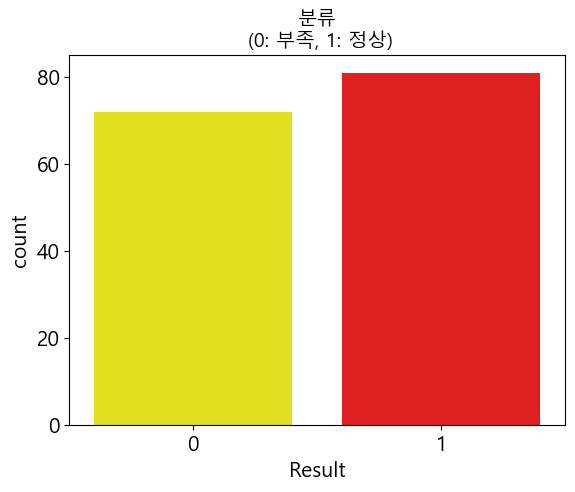

In [77]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)

import seaborn as sns

colors = ["yellow", "red"]
sns.countplot(x="Result", data=df, palette=colors)
plt.title("분류\n (0: 부족, 1: 정상)", fontsize=14)

# 불균형 데이터셋

In [78]:
train_cols = ["Solar.R", "Wind", "Temp"]
X = df[train_cols]
y = df["Result"]

In [79]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])

df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [80]:
# 상관계수 분석
df.corr()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
Month,1.000000,-0.007962,-0.072904,-0.178293,0.420947,0.149578,0.014185
Day,-0.007962,1.000000,-0.145621,0.027181,-0.130593,-0.011460,0.066517
Solar.R,-0.072904,-0.145621,1.000000,-0.055245,0.262569,0.302927,0.211084
Wind,-0.178293,0.027181,-0.055245,1.000000,-0.457988,-0.531028,-0.352618
Temp,0.420947,-0.130593,0.262569,-0.457988,1.000000,0.608737,0.522614
Ozone,0.149578,-0.011460,0.302927,-0.531028,0.608737,1.000000,0.698721
Result,0.014185,0.066517,0.211084,-0.352618,0.522614,0.698721,1.000000


c:\python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


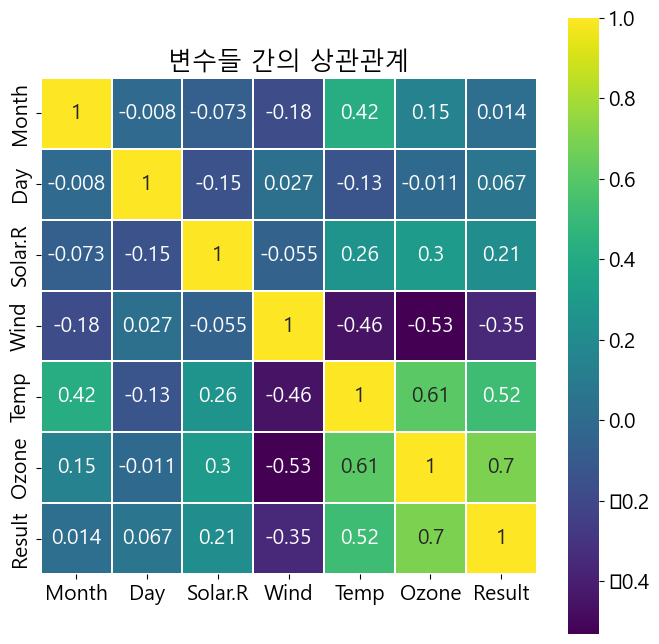

In [81]:
# 상관계수 → hitmap으로 출력
X = X_samp[train_cols]
y = y_samp["Result"]

df_samp["Result"].value_counts()

# 상관계수 행렬 그래프
plt.figure(figsize=(8, 8))
plt.rc("font", size=15)

sns.heatmap(
    df.corr(),
    linewidths=0.01,
    square=True,
    annot=True,
    cmap=plt.cm.viridis,
    linecolor="white",
)

plt.title("변수들 간의 상관관계")
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

# 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=7
)

In [83]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(name="mymodel") # 신경망모델(이름 설정)
model.add(
    Dense(128, input_shape=(len(X_train.columns),), activation="relu", name="hidden-1")
)
model.add(Dense(64, activation="relu", name="hidden-2"))
model.add(Dense(64, activation="relu", name="hidden-3"))
model.add(Dense(1, activation="sigmoid", name="output"))

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
#               손실함수  최적화함수(오차수정)   평가기준(정확도)

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
from datetime import datetime
import tensorflow as tf

# 디렉토리 생성 → 로그 저장
logdir = "c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
logdir

# cmd에서 → tensorboard --logdir=c:/logs/20240328-113921 (로그파일경로) → ctrl+링크 클릭
# tensorboard 그래프 확인 가능

'c:/logs/20240328-114707'

In [87]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # 로그저장 디렉토리
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500, callbacks=[tensorboard_callback])

Epoch 1/500


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6182 - loss: 0.2441  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.2219 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.2072 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.1955 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.1779 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7578 - loss: 0.1829 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7814 - loss: 0.1623 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.1522 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7616 - loss: 0.1594 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.1507 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.1557 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7755 - loss: 0.1523 


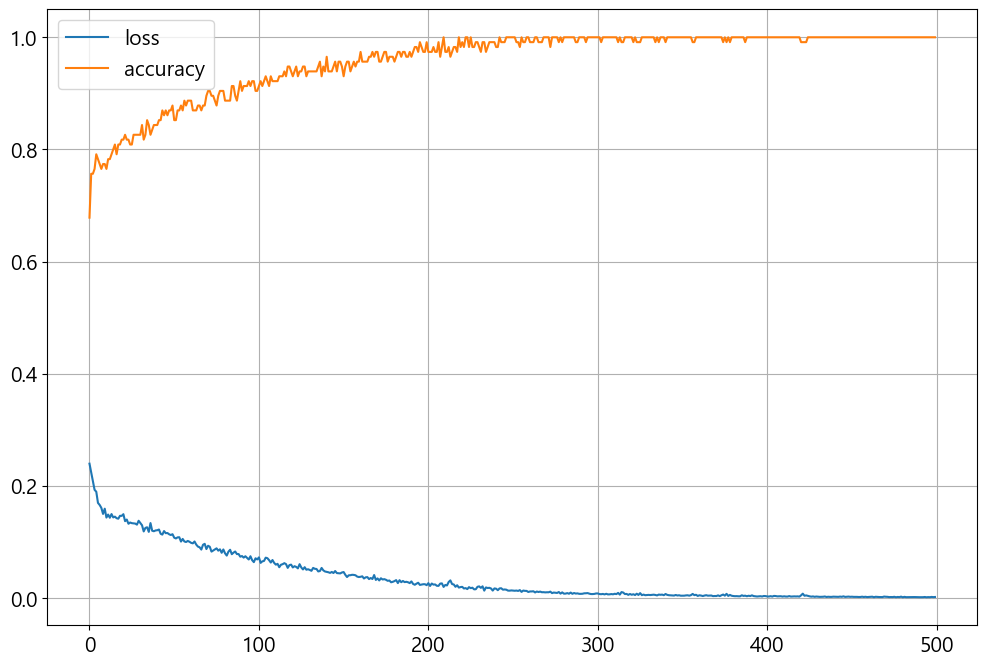

In [88]:
# tensorboard --logdir=로그파일경로
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])  # 학습용 데이터셋의 손실률
plt.plot(hist.history["accuracy"])  # 학습용 데이터셋의 정확도
plt.legend(["loss", "accuracy"])
plt.grid()
plt.show()

In [89]:
# 모델 평가
# 학습용
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# 검증용
scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 1.0000 - loss: 0.0016
[0.001137399929575622, 1.0]
compile_metrics: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7586 - loss: 0.2194
[0.21936209499835968, 0.7586206793785095]
compile_metrics: 75.86%


In [90]:
# 새로운 값 예측
# 일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량
test_set = [[25, 10.8, 71]]
test_set = scaler.transform(test_set)
print(model.predict(test_set))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5249628]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [91]:
# 일조량 20, 풍량 4.3, 화씨온도 70도일 때의 오존량
test_set = [[20, 4.3, 70]]
test_set = scaler.transform(test_set)
print(model.predict(test_set))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.00259062]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
model.save("c:/data/ozone/ozone.keras")

In [93]:
import joblib

joblib.dump(scaler, "c:/data/ozone/scaler.model")

['c:/data/ozone/scaler.model']